<a href="https://colab.research.google.com/github/shaynyx/marvel/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear regression**

Linear regression is a way to predict one thing based on another. Imagine you have a bunch of pairs of numbers, like the size of a house (in square feet) and its price (in dollars). Linear regression helps you find a straight line that best fits these pairs. Once you have that line, you can use it to make predictions. So, if you know the size of a house, you can predict its price.

In simpler terms, it's like drawing a line through points on a graph so that it comes as close as possible to all those points. Once you have that line, you can use it to guess one number when you know the other.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#variables to store mean and standard deviation for each feature
mu = []
std = []


This function load_data loads data from a CSV file specified by filename. It reads the file using Pandas, assumes comma (,) as the separator, and renames the columns as "housesize," "rooms," and "price." Then, it converts the data to a NumPy array, extracts the first two columns as features and the last column as the target variable (price), and calls two other functions: plot_data and normalize. Finally, it returns the features and target variable as NumPy arrays.

In [ ]:
def load_data(filename):
    df = pd.read_csv(filename, sep="," , index_col=False)
    df.columns = ["housesize", "rooms", "price"]
    data = np.array(df, dtype=float)
    plot_data(data[:, :2], data[:, -1])
    normalize(data)
    return data[:, :2], data[:, -1]

In [ ]:
def plot_data(x, y):
    plt.xlabel('house size')
    plt.ylabel('price')
    plt.plot(x[:, 0], y, 'bo')
    plt.show()

The normalize function takes the data as input and standardizes each feature. It subtracts the mean and divides by the standard deviation for each feature. It also appends the mean and standard deviation values to the mu and std lists for later use.

In [ ]:
def normalize(data):
    for i in range(data.shape[1] - 1):
        data[:, i] = ((data[:, i] - np.mean(data[:, i])) / np.std(data[:, i]))
        mu.append(np.mean(data[:, i]))
        std.append(np.std(data[:, i]))

In [ ]:
def h(x, theta):
    return np.matmul(x, theta) #matrix multiplication


h(x, theta): This part calculates the predicted values for the given input features x and model parameters theta. It uses the h function, which is essentially performing matrix multiplication between x and theta. This operation produces the predicted target values based on the current model.

(h(x, theta) - y): This part calculates the difference between the predicted values h(x, theta) and the actual target values y. It represents the errors or residuals for each data point.

(h(x, theta) - y).T: The .T stands for transpose. This operation transposes the matrix of errors. Transposing a matrix swaps its rows and columns.

(h(x, theta) - y).T @ (h(x, theta) - y): This is the dot product (matrix multiplication) of the transposed errors with the original errors. It effectively calculates the sum of squared errors. This is a common way to measure the overall error in a linear regression model.

/(2 * y.shape[0]): Finally, the sum of squared errors is divided by twice the number of data points (y.shape[0]) and returns the average squared error. Dividing by 2 is a convention used in linear regression cost functions to simplify the later gradient computation.

The result of this entire expression is the Mean Squared Error (MSE) of the model's predictions. The goal during training is to minimize this cost by adjusting the model parameters theta. Lower MSE indicates a better-fitting model.



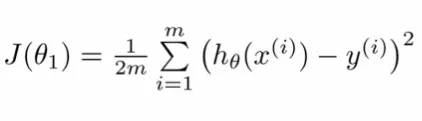

In [ ]:
def cost_function(x, y, theta):
    return ((h(x, theta) - y).T @ (h(x, theta) - y)) / (2 * y.shape[0])

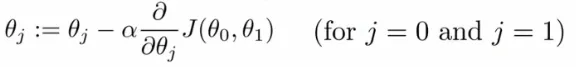

In [ ]:
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
    m = x.shape[0]
    J_all = []
# theta: Initial model parameters (coefficients and intercept).
# learning_rate: Learning rate, a hyperparameter that controls the step size in each iteration of gradient descent. It's set to a default value of 0.1.
# num_epochs: The number of iterations (epochs) for which the gradient descent algorithm runs. It's also set to a default value of 10.
    for _ in range(num_epochs):
        h_x = h(x, theta)
        cost_ = (1 / m) * (x.T @ (h_x - y))
        # This line updates the model parameters theta based on the gradient and the learning rate. It subtracts the scaled gradient vector from the
        # current theta. The learning rate controls how large or small these parameter updates are. Smaller learning rates make the updates smaller,
        # which can help in convergence but may require more iterations.
        theta = theta - (learning_rate) * cost_
        J_all.append(cost_function(x, y, theta))

    return theta, J_all

In [ ]:
def plot_cost(J_all, num_epochs):
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(range(num_epochs), J_all, 'm', linewidth="5")
    plt.show()

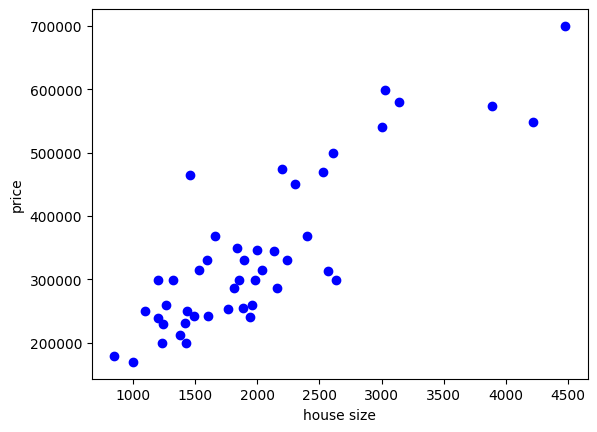

Cost:  [[2.08475311e+09]]
Parameters:  [[ 3.37371711e+05]
 [ 1.04066024e+05]
 [-6.47874139e+01]]


In [ ]:
x, y = load_data('https://raw.githubusercontent.com/kumudlakara/Medium-codes/main/linear_regression/house_price_data.txt')
y = np.reshape(y, (46, 1))
x = np.hstack((np.ones((x.shape[0], 1)), x))
theta = np.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 50
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost: ", J)
print("Parameters: ", theta)

**hθ(x) = θ0 + θ1x1 + θ2x2**

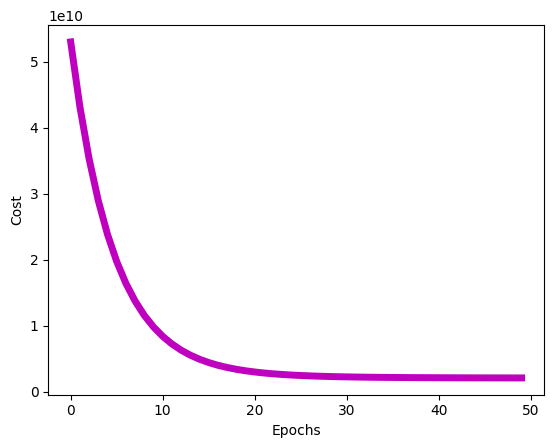

Price of house:  [1.66842816e+08]


In [ ]:
def test(theta, x):
    x[0] = (x[0] - mu[0]) / std[0]
    x[1] = (x[1] - mu[1]) / std[1]
# hθ(x) = θ0 + θ1x1 + θ2x2
    y = theta[0] + theta[1] * x[0] + theta[2] * x[1]
    print("Price of house: ", y)

# For testing and plotting cost
n_epochs = list(range(num_epochs))
jplot = [i[0][0] for i in J_all]
plot_cost(jplot, num_epochs)

test(theta, [1600, 3])

**Logistic regression**


Logistic regression is a statistical method used for classification tasks, not for predicting continuous values like linear regression. It helps answer questions with yes/no outcomes or categorizes data into two or more classes.

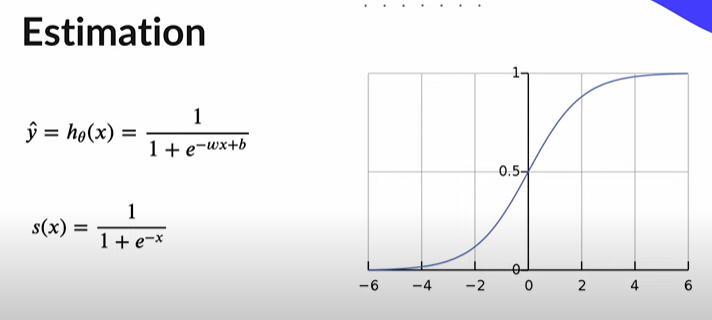


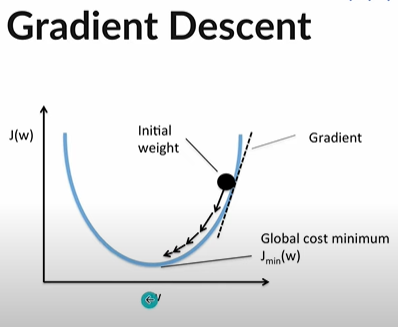


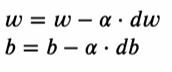

In [ ]:

import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

clf = LogisticRegression(lr=0.01)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

acc = accuracy(y_pred, y_test)
print(acc)

<ipython-input-12-46d34cf21b55>:4: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


0.9210526315789473


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))
print('-'*55)
print('Confusion Matrix\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        45
           1       0.92      0.96      0.94        69

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114

-------------------------------------------------------
Confusion Matrix

[[39  6]
 [ 3 66]]
